In [1]:
import torch
import torch.nn as nn
from torchvision.io.video import read_video
import matplotlib.pyplot as plt
from torchvision.models.video import mvit_v2_s, MViT_V2_S_Weights, mvit_v1_b, MViT_V1_B_Weights
import torchvision.transforms as transforms
import einops

In [2]:
from SoccerNet.Evaluation.MV_FoulRecognition import evaluate
import random
import numpy as np 

In [3]:
import os
os.chdir("..")

In [4]:
from  data_loader import label2vectormerge, clips2vectormerge

In [5]:
start_frame = 63
end_frame = 87
fps = 10
num_views = 5 
split = 'valid'
path = 'dataset224p/'

In [6]:
os.getcwd()

'/home/przemo10/SocerNetProject/sn-mvfoul/vars-model'

In [7]:
labels_offence_severity, labels_action, distribution_offence_severity, distribution_action, not_taking, number_of_actions = label2vectormerge(path, split, num_views)
clips = clips2vectormerge(path, split, num_views, not_taking)
distribution_offence_severity = torch.div(distribution_offence_severity, len(labels_offence_severity))
distribution_action = torch.div(distribution_action, len(labels_action))
weights_offence_severity = torch.div(1, distribution_offence_severity)
weights_action = torch.div(1, distribution_action)

In [8]:
print(f' Lista akcji poprawnych: {number_of_actions}')

 Lista akcji poprawnych: ['0', '1', '3', '6', '7', '8', '9', '10', '11', '12', '13', '16', '17', '18', '20', '21', '23', '24', '25', '26', '27', '28', '29', '31', '32', '33', '35', '36', '37', '38', '39', '40', '41', '43', '44', '45', '46', '47', '48', '49', '50', '53', '56', '58', '59', '62', '63', '65', '66', '67', '68', '69', '70', '71', '72', '74', '75', '76', '77', '78', '79', '80', '82', '83', '84', '85', '87', '88', '89', '90', '91', '93', '95', '97', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '116', '118', '119', '120', '121', '122', '124', '127', '128', '129', '131', '132', '133', '134', '135', '138', '140', '142', '144', '145', '146', '147', '149', '150', '151', '152', '153', '154', '155', '156', '157', '158', '159', '160', '161', '163', '165', '166', '167', '168', '169', '170', '171', '173', '174', '175', '177', '178', '179', '183', '184', '185', '187', '190', '192', '193', '194', '195', '198', '199', '200', '204'

In [7]:
clips

[['dataset224p/valid/action_0/clip_0.mp4',
  'dataset224p/valid/action_0/clip_1.mp4',
  'dataset224p/valid/action_0/clip_2.mp4'],
 ['dataset224p/valid/action_1/clip_0.mp4',
  'dataset224p/valid/action_1/clip_1.mp4'],
 ['dataset224p/valid/action_3/clip_0.mp4',
  'dataset224p/valid/action_3/clip_1.mp4',
  'dataset224p/valid/action_3/clip_2.mp4'],
 ['dataset224p/valid/action_6/clip_0.mp4',
  'dataset224p/valid/action_6/clip_1.mp4'],
 ['dataset224p/valid/action_7/clip_0.mp4',
  'dataset224p/valid/action_7/clip_1.mp4',
  'dataset224p/valid/action_7/clip_2.mp4'],
 ['dataset224p/valid/action_8/clip_0.mp4',
  'dataset224p/valid/action_8/clip_1.mp4'],
 ['dataset224p/valid/action_9/clip_0.mp4',
  'dataset224p/valid/action_9/clip_1.mp4'],
 ['dataset224p/valid/action_10/clip_0.mp4',
  'dataset224p/valid/action_10/clip_1.mp4'],
 ['dataset224p/valid/action_11/clip_0.mp4',
  'dataset224p/valid/action_11/clip_1.mp4'],
 ['dataset224p/valid/action_12/clip_0.mp4',
  'dataset224p/valid/action_12/clip_1.mp

In [9]:
start = start_frame
end = end_frame
#transform = transform
# transform_model = transform_model
num_views = num_views

factor = (end - start) / (((end - start) / 25) * fps)

length = len(clips)
print(len(clips))

321


In [10]:
index = 4

clips[index]

['dataset224p/valid/action_7/clip_0.mp4',
 'dataset224p/valid/action_7/clip_1.mp4',
 'dataset224p/valid/action_7/clip_2.mp4']

In [11]:
prev_views = []

for num_view in range(len(clips[index])):
    index_view = num_views
    if len(prev_views) == 2:
        continue
    cont = True
    while cont:
        aux = random.randint(0, len(clips[index]) - 1)
        if aux not in prev_views:
            cont = False
            print(aux)
    index_view = aux
    prev_views.append(index_view)
    print(index_view)
print(prev_views)
index_view = prev_views[-1]
print(index_view)

2
2
1
1
[2, 1]
1


In [12]:
prev_views

[2, 1]

In [13]:
video, _, _ = read_video(clips[index][index_view], output_format="THWC", pts_unit='sec')


In [14]:
video.shape

torch.Size([127, 224, 398, 3])

In [15]:
import cv2

In [16]:
from IPython.display import Video

In [17]:
video_path = clips[index][index_view]

In [18]:
Video(video_path)

In [19]:
cap = cv2.VideoCapture(video_path)
frames = []
success, frame = cap.read()
while success:
    frames.append(frame)
    success, frame = cap.read()
cap.release()
cv2.destroyAllWindows()

In [20]:
np.array(frames).shape

(127, 224, 398, 3)

In [21]:
def display_video(frames):
    for frame in frames:
        cv2.imshow('Video', frame)
        if cv2.waitKey(25) & 0xFF == ord('q'):
            break
    cv2.destroyAllWindows()

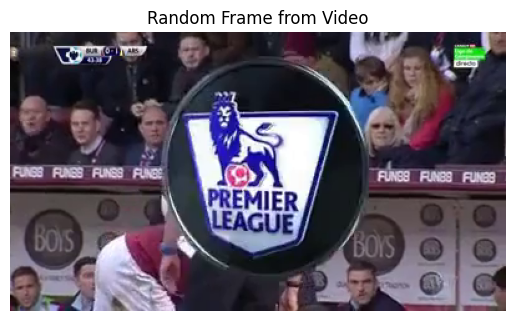

In [22]:
random_frame = random.choice(frames)

# Convert BGR (OpenCV format) to RGB (Matplotlib format)
random_frame_rgb = cv2.cvtColor(random_frame, cv2.COLOR_BGR2RGB)
# Plot the random frame
plt.imshow(random_frame_rgb)
plt.title("Random Frame from Video")
plt.axis('off')  # Hide axis
plt.show()

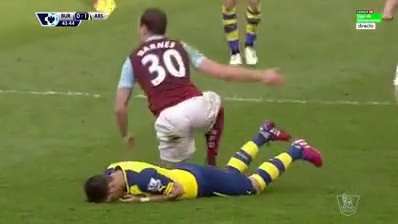

In [ ]:
from IPython.display import display, Image, clear_output
import time

def display_video(frames, frame_rate=24):
    interval = 1 / frame_rate  # Time interval between frames
    for frame in frames:
        _, buffer = cv2.imencode('.jpg', frame)
        display(Image(data=buffer))
        time.sleep(interval)
        clear_output(wait=True)

# Example: Display the video at 24 fps
display_video(frames, frame_rate=17)


In [ ]:
frames_skip = []
for i in range(40,95):
    if i:
        frames_skip.append(frames[i])

In [ ]:
display_video(frames_skip, frame_rate = 50)

In [ ]:
video.shape

In [ ]:
7%factor

In [ ]:
torch.Tensor(np.array(frames)).shape

In [ ]:
video[7,:,:,:].unsqueeze(0).shape

In [ ]:
tensor_frames = video[start:end,:,:]
tensor_frames.shape

In [ ]:
transformAug = transforms.Compose([
    transforms.RandomAffine(degrees=(0, 0), translate=(0.1, 0.1), scale=(0.9, 1)),
    transforms.RandomPerspective(distortion_scale=0.3, p=0.5),
    transforms.RandomRotation(degrees=5),
    transforms.ColorJitter(brightness=0.5, saturation=0.5, contrast=0.5),
    transforms.RandomHorizontalFlip()
])

In [ ]:
final_frames = None
for j in range(len(tensor_frames)):
    if j%factor<1:
        if final_frames == None:
            final_frames = tensor_frames[j,:,:,:].unsqueeze(0)
            print(final_frames.shape)
        else:
            final_frames = torch.cat((final_frames, tensor_frames[j,:,:,:].unsqueeze(0)), 0)

final_frames.shape

In [ ]:
final_frames = final_frames.permute(0, 3, 1, 2)
print(final_frames.shape)
final_frames = transformAug(final_frames)

In [ ]:
final_frames

In [ ]:
transforms_model = MViT_V2_S_Weights.KINETICS400_V1.transforms()

In [ ]:
transforms_model

In [ ]:
transforms_model(final_frames).shape

In [37]:
transformed_final_frames = transforms_model(final_frames)
transformed_final_frames = transformed_final_frames.permute(1, 0, 2, 3)
transformed_final_frames.shape

torch.Size([10, 3, 224, 224])

In [38]:
for num_view in range(0,2):
    if num_view == 0:
        videos = transformed_final_frames.unsqueeze(0)
    else:
        final_frames = transformed_final_frames.unsqueeze(0)
        videos = torch.cat((videos, final_frames), 0)

In [39]:
transformed_final_frames.unsqueeze(0).shape

torch.Size([1, 10, 3, 224, 224])

In [40]:
videos.squeeze().shape

torch.Size([2, 10, 3, 224, 224])

In [41]:
videos.permute(0, 2, 1, 3, 4).shape


torch.Size([2, 3, 10, 224, 224])

In [42]:
    def work_get_item(index):

        prev_views = []

        for num_view in range(len(clips[index])):

            index_view = num_view

            if len(prev_views) == 2:
                continue

            # As we use a batch size > 1 during training, we always randomly select two views even if we have more than two views.
            # As the batch size during validation and testing  is 1, we can have 2, 3 or 4 views per action.
            cont = True
            split = 'train'
            if split == 'train':
                while cont:
                    aux = random.randint(0, len(clips[index])-1)
                    if aux not in prev_views:
                        cont = False
                index_view = aux
                prev_views.append(index_view)

            video, _, _ = read_video(clips[index][index_view], output_format="THWC", pts_unit='sec')
            frames = video[start:end,:,:,:]

            final_frames = None

            for j in range(len(frames)):
                if j%factor<1:
                    if final_frames == None:
                        final_frames = frames[j,:,:,:].unsqueeze(0)
                    else:
                        final_frames = torch.cat((final_frames, frames[j,:,:,:].unsqueeze(0)), 0)

            final_frames = final_frames.permute(0, 3, 1, 2)

            if transformAug != None:
                final_frames = transformAug(final_frames)

            final_frames = transforms_model(final_frames)
            final_frames = final_frames.permute(1, 0, 2, 3)
            
            if num_view == 0:
                videos = final_frames.unsqueeze(0)
            else:
                final_frames = final_frames.unsqueeze(0)
                videos = torch.cat((videos, final_frames), 0)

        if num_views != 1 and num_views != 5:
            videos = videos.squeeze()   

        videos = videos.permute(0, 2, 1, 3, 4)

        if split != 'chall':
            return labels_offence_severity[index][0], labels_action[index][0], videos, number_of_actions[index]
        else:
            return -1, -1, videos, str(index)



In [62]:
#work_get_item(2)

In [44]:
work_get_item(2)[2].shape

torch.Size([2, 3, 10, 224, 224])

In [45]:
test_data = work_get_item(2)[2]

In [46]:
weights_model = MViT_V2_S_Weights.DEFAULT
network = mvit_v2_s(weights=weights_model)

In [47]:
for name, param in network.named_parameters():
    print(name, param.shape)

conv_proj.weight torch.Size([96, 3, 3, 7, 7])
conv_proj.bias torch.Size([96])
pos_encoding.class_token torch.Size([96])
blocks.0.norm1.weight torch.Size([96])
blocks.0.norm1.bias torch.Size([96])
blocks.0.norm2.weight torch.Size([96])
blocks.0.norm2.bias torch.Size([96])
blocks.0.attn.rel_pos_h torch.Size([111, 96])
blocks.0.attn.rel_pos_w torch.Size([111, 96])
blocks.0.attn.rel_pos_t torch.Size([15, 96])
blocks.0.attn.qkv.weight torch.Size([288, 96])
blocks.0.attn.qkv.bias torch.Size([288])
blocks.0.attn.project.0.weight torch.Size([96, 96])
blocks.0.attn.project.0.bias torch.Size([96])
blocks.0.attn.pool_q.pool.weight torch.Size([96, 1, 3, 3, 3])
blocks.0.attn.pool_q.norm_act.0.weight torch.Size([96])
blocks.0.attn.pool_q.norm_act.0.bias torch.Size([96])
blocks.0.attn.pool_k.pool.weight torch.Size([96, 1, 3, 3, 3])
blocks.0.attn.pool_k.norm_act.0.weight torch.Size([96])
blocks.0.attn.pool_k.norm_act.0.bias torch.Size([96])
blocks.0.attn.pool_v.pool.weight torch.Size([96, 1, 3, 3, 3])

In [68]:
for name, param in network.named_parameters():
    print(name, param.shape)

conv_proj.weight torch.Size([96, 3, 3, 7, 7])
conv_proj.bias torch.Size([96])
pos_encoding.class_token torch.Size([96])
blocks.0.norm1.weight torch.Size([96])
blocks.0.norm1.bias torch.Size([96])
blocks.0.norm2.weight torch.Size([96])
blocks.0.norm2.bias torch.Size([96])
blocks.0.attn.rel_pos_h torch.Size([111, 96])
blocks.0.attn.rel_pos_w torch.Size([111, 96])
blocks.0.attn.rel_pos_t torch.Size([15, 96])
blocks.0.attn.qkv.weight torch.Size([288, 96])
blocks.0.attn.qkv.bias torch.Size([288])
blocks.0.attn.project.0.weight torch.Size([96, 96])
blocks.0.attn.project.0.bias torch.Size([96])
blocks.0.attn.pool_q.pool.weight torch.Size([96, 1, 3, 3, 3])
blocks.0.attn.pool_q.norm_act.0.weight torch.Size([96])
blocks.0.attn.pool_q.norm_act.0.bias torch.Size([96])
blocks.0.attn.pool_k.pool.weight torch.Size([96, 1, 3, 3, 3])
blocks.0.attn.pool_k.norm_act.0.weight torch.Size([96])
blocks.0.attn.pool_k.norm_act.0.bias torch.Size([96])
blocks.0.attn.pool_v.pool.weight torch.Size([96, 1, 3, 3, 3])

In [48]:
network.head

Sequential(
  (0): Dropout(p=0.5, inplace=True)
  (1): Linear(in_features=768, out_features=400, bias=True)
)

In [49]:
network(batch_tensor(test_data,dim=1,squeeze=True))

NameError: name 'batch_tensor' is not defined

In [53]:
network.conv_proj

Conv3d(3, 96, kernel_size=(3, 7, 7), stride=(2, 4, 4), padding=(1, 3, 3))

In [54]:
for block in network.blocks:
    print(block)

MultiscaleBlock(
  (norm1): LayerNorm((96,), eps=1e-06, elementwise_affine=True)
  (norm2): LayerNorm((96,), eps=1e-06, elementwise_affine=True)
  (attn): MultiscaleAttention(
    (qkv): Linear(in_features=96, out_features=288, bias=True)
    (project): Sequential(
      (0): Linear(in_features=96, out_features=96, bias=True)
    )
    (pool_q): Pool(
      (pool): Conv3d(96, 96, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), groups=96, bias=False)
      (norm_act): Sequential(
        (0): LayerNorm((96,), eps=1e-06, elementwise_affine=True)
      )
    )
    (pool_k): Pool(
      (pool): Conv3d(96, 96, kernel_size=(3, 3, 3), stride=(1, 8, 8), padding=(1, 1, 1), groups=96, bias=False)
      (norm_act): Sequential(
        (0): LayerNorm((96,), eps=1e-06, elementwise_affine=True)
      )
    )
    (pool_v): Pool(
      (pool): Conv3d(96, 96, kernel_size=(3, 3, 3), stride=(1, 8, 8), padding=(1, 1, 1), groups=96, bias=False)
      (norm_act): Sequential(
        (0): LayerNo

In [57]:
embed_dim = 96
n = 3


In [59]:
torch.zeros(1, n, embed_dim).shape

torch.Size([1, 3, 96])

In [67]:
network.head[1].in_features

768